Approximate run duration: 24 hours

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final


In [ ]:
import sys
sys.path.append('code/')

In [ ]:

from rww_pytorch_model import RNNWWD
from rww_pytorch_model import Model_fitting
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import seaborn as sns # for plotting 
import time # for timer
import os

In [ ]:
def plot_sim_states_outputs(ts, output):
    """
    Plot the simulation states of trained input parameters. 

    Parameters
    ----------
    ts_sim: tensor with node_size X datapoint
        simulated BOLD
    ts: tensor with node_size X datapoint
        empirical BOLD
    E_sim: tensor with node_size X datapoint 
        simulated E 
    I_sim: tensor with node_size X datapoint
        simulated I 
    x_sim: tensor with node_size X datapoint
        simulated x 
    f_sim: tensor with node_size X datapoint
        simulated f 
    v_sim: tensor with node_size X datapoint
        simulated v 
    q_sim: tensor with node_size X datapoint
        simulated q 
    """
    ts_sim = output['simBOLD']
    E_sim = output['E']
    I_sim = output['I'] 
    x_sim = output['x'] 
    f_sim = output['f']
    v_sim = output['v'] 
    q_sim = output['q']
    fig, ax = plt.subplots(5, 2, figsize=(12,8))
    im1 = ax[0,0].imshow(np.corrcoef(ts_sim), cmap = 'bwr')
    ax[0,0].set_title('simFC')
    fig.colorbar(im1, ax=ax[0,0])
    im2 = ax[0,1].imshow(np.corrcoef(ts.T), cmap = 'bwr')
    ax[0,1].set_title('expFC')
    fig.colorbar(im2, ax=ax[0,1])
    ax[1,0].plot(ts_sim.T)
    ax[1,0].set_title('simBOLD')
    ax[1,1].plot(ts)
    ax[1,1].set_title('expBOLD')
    ax[2,0].plot(E_sim.T)
    ax[2,0].set_title('sim E')
    ax[2,1].plot(I_sim.T)
    ax[2,1].set_title('sim I')
    ax[3,0].plot(x_sim.T)
    ax[3,0].set_title('sim x')
    ax[3,1].plot(f_sim.T)
    ax[3,1].set_title('sim f')
    ax[4,0].plot(v_sim.T)
    ax[4,0].set_title('sim v')
    ax[4,1].plot(q_sim.T)
    ax[4,1].set_title('sim q')
    plt.show()
    
def plot_fit_parameters(output):
    g_par = output['g'] 
    gEE_par = output['gEE'] 
    gIE_par = output['gIE'] 
    gEI_par = output['gEI'] 
    g_mean_par = output['gmean'] 
    g_var_par = output['gvar'] 
    cA_par = output['cA'] 
    cB_par = output['cB'] 
    cC_par = output['cC'] 
    sigma_par = output['sigma_state']
    sigma_out_par = output['sigma_bold']
    """
    Plot the simulation states of fitted input parameters. 

    Parameters
    ----------
    g_par: list of fitted parameter values
        for g
    gEE_par: list of fitted parameter values
        for gEE
    gIE_par: list of fitted parameter values
        for gIE
    gEI_par: list of fitted parameter values
        for gEI
    sc_par: list of fitted parameter values
        for structural connectivity
    sc_par: list of fitted parameter values
        for sigma
    """
    fig, ax = plt.subplots(6,2, figsize=(12,8))
    im1 = ax[0,0].plot(g_par)
    ax[0,0].set_title('g')
    
    ax[0,1].plot(gEE_par)
    ax[0,1].set_title('gEE')
    
    ax[1,0].plot(gIE_par)
    ax[1,0].set_title('gIE')
    ax[1,1].plot(gEI_par)
    ax[1,1].set_title('gEI')
    
    ax[2,0].plot(sigma_par)
    ax[2,0].set_title('sc')

    ax[2,1].plot(sigma_out_par)
    ax[2,1].set_title('$\sigma$')
    ax[3,0].plot(g_mean_par)
    ax[3,0].set_title('post mean: g')

    ax[3,1].plot(g_var_par)
    ax[3,1].set_title('post var: g')

    ax[4,0].plot(cA_par)
    ax[4,0].set_title('post poly:A')

    ax[4,1].plot(cB_par)
    ax[4,1].set_title('post poly:B')

    ax[5,0].plot(cC_par)
    ax[5,0].set_title('post poly:C')
    

In [ ]:
import os
out_dir = '../data/HCP/'
base_dir = '../data/HCP/'
subs =sorted([sc_file[-10:-4] for sc_file in os.listdir(base_dir) if sc_file[:8] == 'weights_'])


0 100307
epoch:  0 0.42114877529744693
epoch:  1 0.19359412117533326
epoch:  2 0.3060558068791537
epoch:  3 0.36786107488624115
epoch:  4 0.5311847734997265
epoch:  5 0.5763720131705882
epoch:  6 0.5820803386470409
epoch:  7 0.592265236233279
epoch:  8 0.5998335841988022
epoch:  9 0.599329540580998
epoch:  10 0.5983555907093921
epoch:  11 0.6053214560312816
epoch:  12 0.6046853241864681
epoch:  13 0.6162717226411331
epoch:  14 0.6198923945044357
epoch:  15 0.6136288438668873
epoch:  16 0.6138500158380323
epoch:  17 0.6190776755739131
epoch:  18 0.6222238825110312
epoch:  19 0.6144080257568213
0.6319093089123707


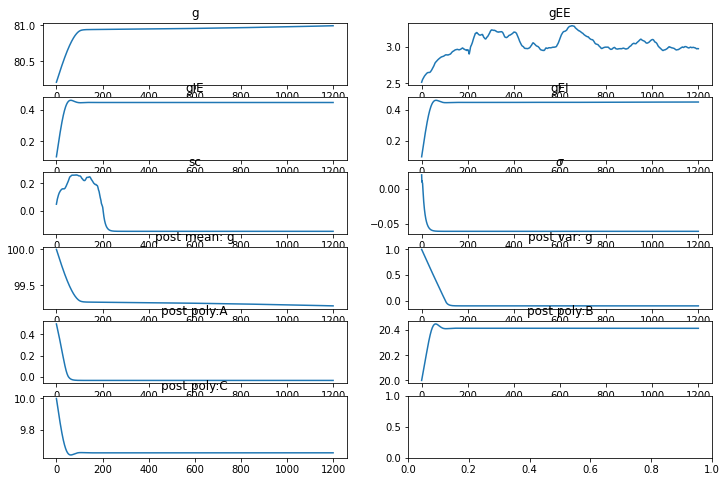

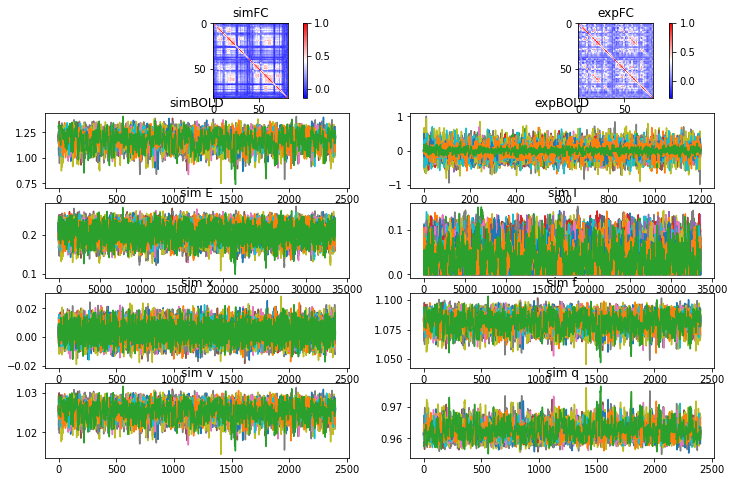

1 148941
epoch:  0 0.4123015362752707
epoch:  1 0.3664948407929894
epoch:  2 0.41000564872287426
epoch:  3 0.5116192671504952
epoch:  4 0.5532835129213771
epoch:  5 0.5528012989548478
epoch:  6 0.6007168155759298
epoch:  7 0.5987264792317745
epoch:  8 0.6110197713777484
epoch:  9 0.6236511157146672
epoch:  10 0.6327549684490356
epoch:  11 0.6345244338352842
epoch:  12 0.6249049719501407
epoch:  13 0.6448721734257811
epoch:  14 0.6607143231089895
epoch:  15 0.6468459098627133
epoch:  16 0.6540970061016247
epoch:  17 0.6403566652743148
epoch:  18 0.6486606185264173
epoch:  19 0.6580298779656905
0.6695575951404921


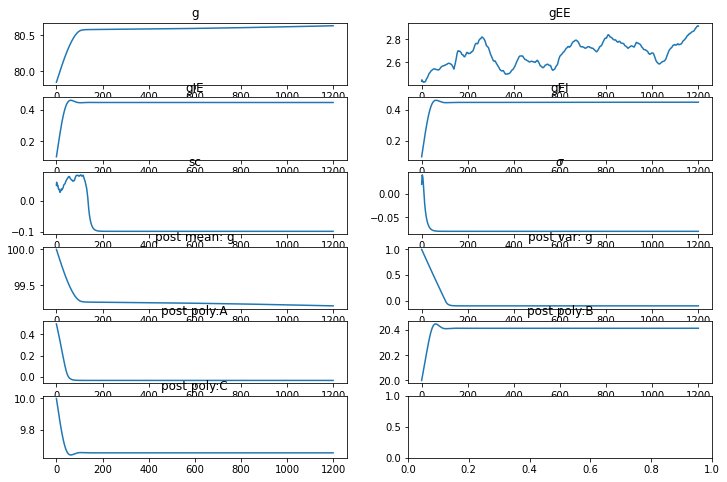

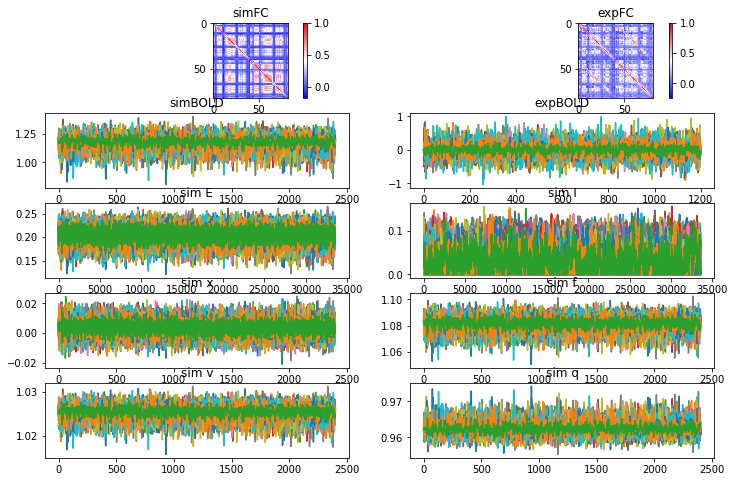

2 149842
epoch:  0 0.32411970786763666
epoch:  1 0.4108783570684819
epoch:  2 0.515553725083024
epoch:  3 0.524373698131393
epoch:  4 0.5301580739401688
epoch:  5 0.5626564976057359
epoch:  6 0.562290982677815
epoch:  7 0.57044429629465
epoch:  8 0.576179966449493
epoch:  9 0.5741074591837512
epoch:  10 0.5844696289634487
epoch:  11 0.6039052592580441
epoch:  12 0.6014389481505628
epoch:  13 0.5872220411357321
epoch:  14 0.6067799590676793
epoch:  15 0.6023802239367778
epoch:  16 0.6189265780032811
epoch:  17 0.6073064618113359
epoch:  18 0.6175715172668895
epoch:  19 0.6120845941645534
0.6147780324142106


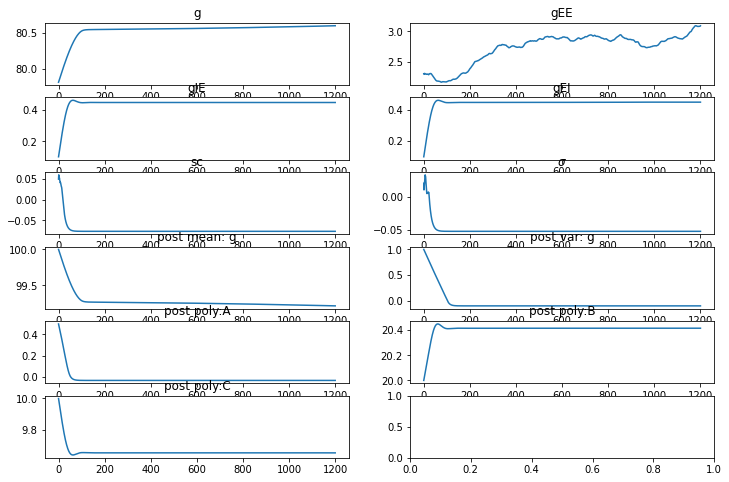

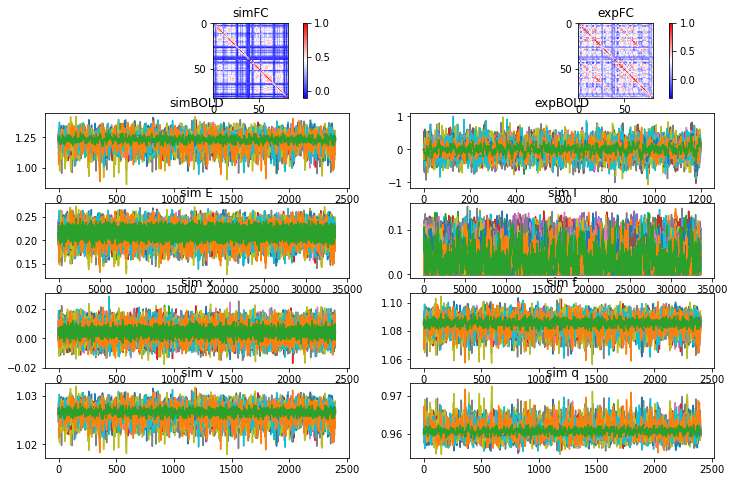

3 150423
epoch:  0 0.40243833356380526
epoch:  1 0.25993450411273333
epoch:  2 0.20852359416879057
epoch:  3 0.40778328193653113
epoch:  4 0.4821076190586068
epoch:  5 0.5417902656546633
epoch:  6 0.5266508152611499
epoch:  7 0.5819020907098665
epoch:  8 0.5664427988883466
epoch:  9 0.5957028324134027
epoch:  10 0.6084432508095937
epoch:  11 0.6184760220255497
epoch:  12 0.6219292921567064
epoch:  13 0.6285798283132324
epoch:  14 0.6202795385488833
epoch:  15 0.6351780902024338
epoch:  16 0.61702001033953
epoch:  17 0.62172060081153
epoch:  18 0.6147641854406236
epoch:  19 0.6245642228344911
0.6269480370021355


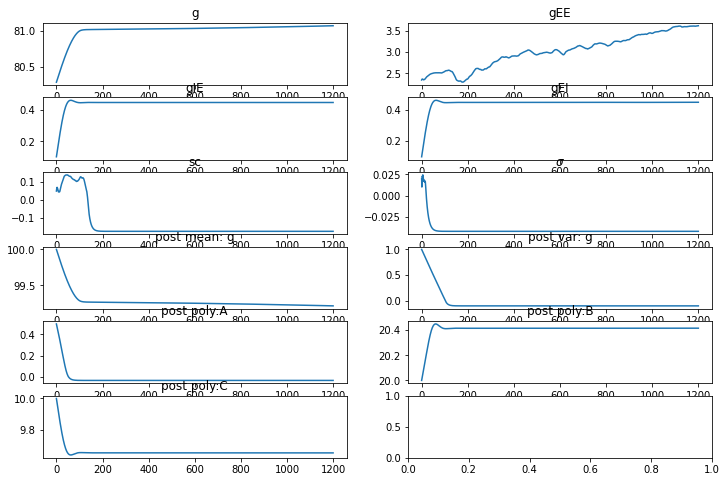

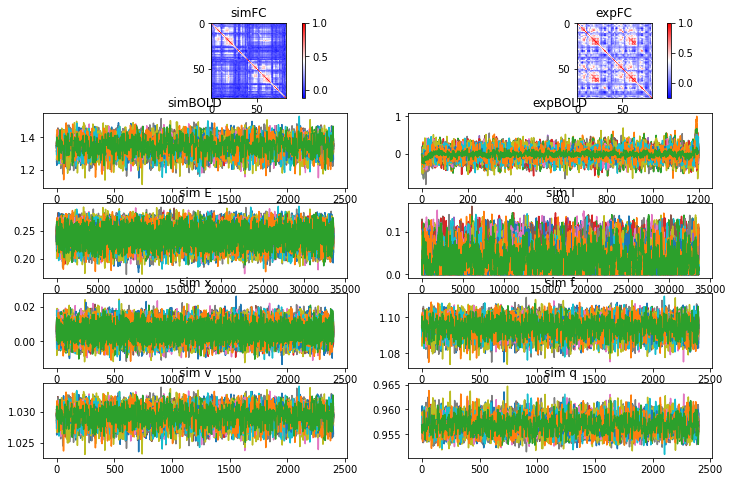

4 150928
epoch:  0 0.4642064443121302
epoch:  1 0.4414187265590689
epoch:  2 0.5685072428978688
epoch:  3 0.38333468357965833
epoch:  4 0.35964083252657736
epoch:  5 0.3497150462361732
epoch:  6 0.5393738770747389
epoch:  7 0.6526586522649444
epoch:  8 0.6633653157932371
epoch:  9 0.6818802778060286
epoch:  10 0.6906726648251139
epoch:  11 0.6865589563939398
epoch:  12 0.6954879575770399
epoch:  13 0.6853688374993776
epoch:  14 0.7065999017483885
epoch:  15 0.7263677485910639
epoch:  16 0.7078500645915747
epoch:  17 0.7079365752407616
epoch:  18 0.6881578274093509
epoch:  19 0.6851790914301441
0.6902660494393498


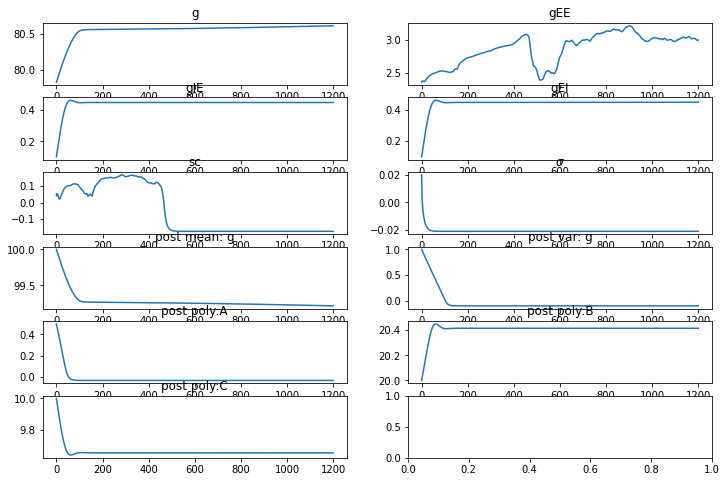

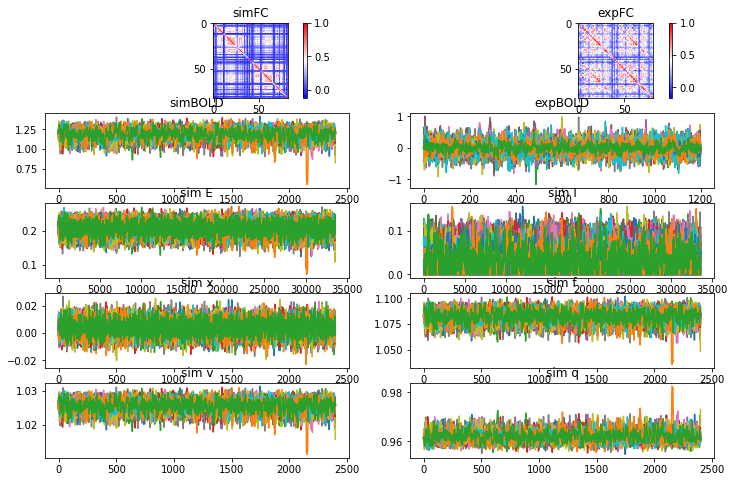

5 151526
epoch:  0 0.21092687797199702
epoch:  1 0.43452873181675555
epoch:  2 0.4827270553546359
epoch:  3 0.518380210958396
epoch:  4 0.5613127916556703
epoch:  5 0.5757686412008756
epoch:  6 0.5881898623782945
epoch:  7 0.6060875697531194
epoch:  8 0.5971773657784262
epoch:  9 0.6224354786586909
epoch:  10 0.6417865794034192
epoch:  11 0.6189344606583145
epoch:  12 0.607606017462931
epoch:  13 0.6230038814893097
epoch:  14 0.6113480761483767
epoch:  15 0.643174743845971
epoch:  16 0.6473250654754351
epoch:  17 0.6396336230076636
epoch:  18 0.6252806770336904
epoch:  19 0.6482338027117007
0.6434713508916607


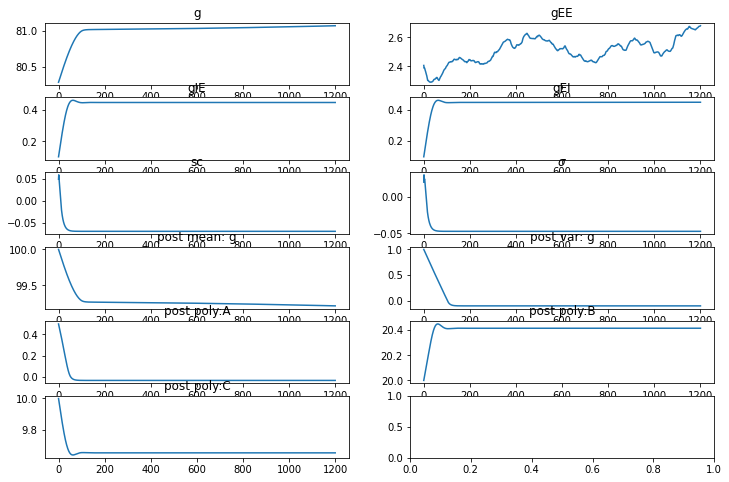

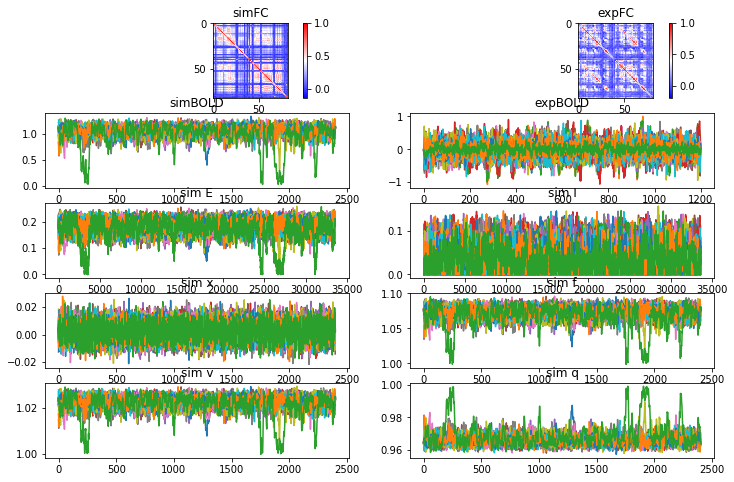

6 153025
epoch:  0 0.4884748054809876
epoch:  1 0.5753562277086929
epoch:  2 0.6679447526047102
epoch:  3 0.710393739430722
epoch:  4 0.7001245835504412
epoch:  5 0.7281508232155371
epoch:  6 0.748625703157501
epoch:  7 0.7384423063509765
epoch:  8 0.7645970956806695
epoch:  9 0.7498431614885165
epoch:  10 0.7663578829804413
epoch:  11 0.7540962108014272
epoch:  12 0.75048724591683
epoch:  13 0.7822757745333782
epoch:  14 0.7709484192760406
epoch:  15 0.7508875961125188
epoch:  16 0.7589532319393639
epoch:  17 0.7650828479709536
epoch:  18 0.7556969693322226
epoch:  19 0.7447286591808489
0.7677156440981262


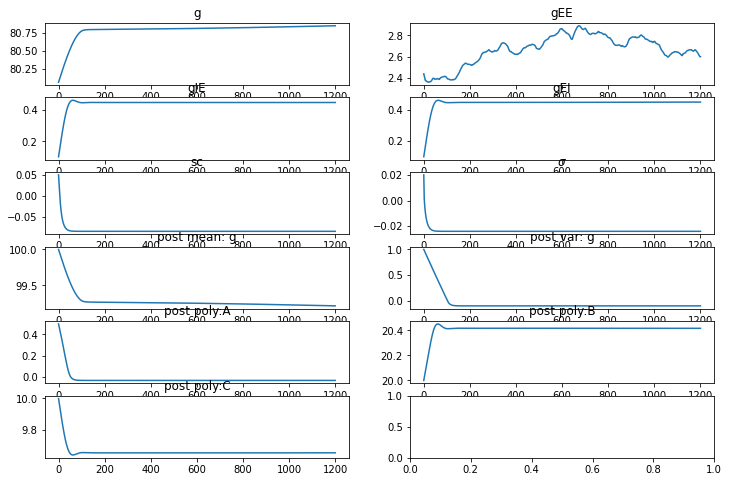

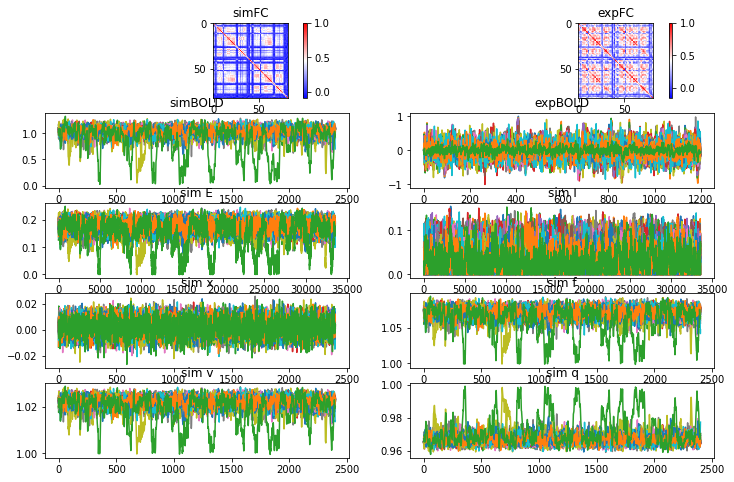

7 154229
epoch:  0 0.390602790734022
epoch:  1 0.37593377126368727
epoch:  2 0.37407991750021474
epoch:  3 0.5209464637577926
epoch:  4 0.5414792759429862
epoch:  5 0.5706597556489312
epoch:  6 0.5789914652601262
epoch:  7 0.5809656169262606
epoch:  8 0.604685077219238
epoch:  9 0.590056461286054
epoch:  10 0.6096644895532612
epoch:  11 0.6309436003612396
epoch:  12 0.6206503979977651
epoch:  13 0.6220216274291609
epoch:  14 0.6211091324542906
epoch:  15 0.6442049138134472
epoch:  16 0.6353876912446663
epoch:  17 0.6436575448214874
epoch:  18 0.6498076762178345
epoch:  19 0.6427269366543492
0.6497010888543874


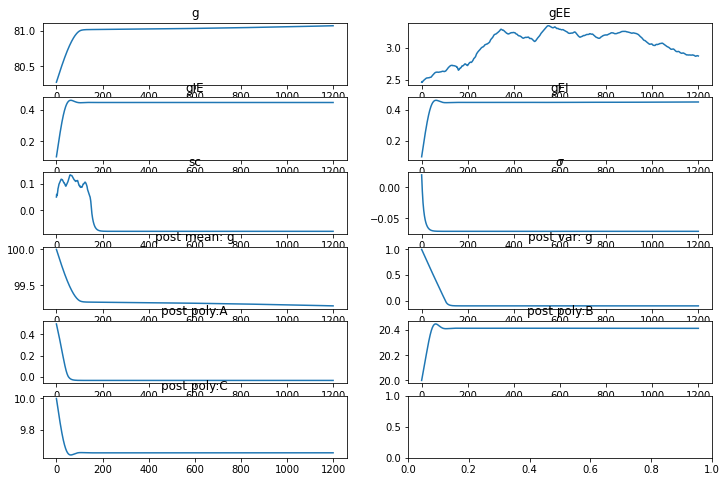

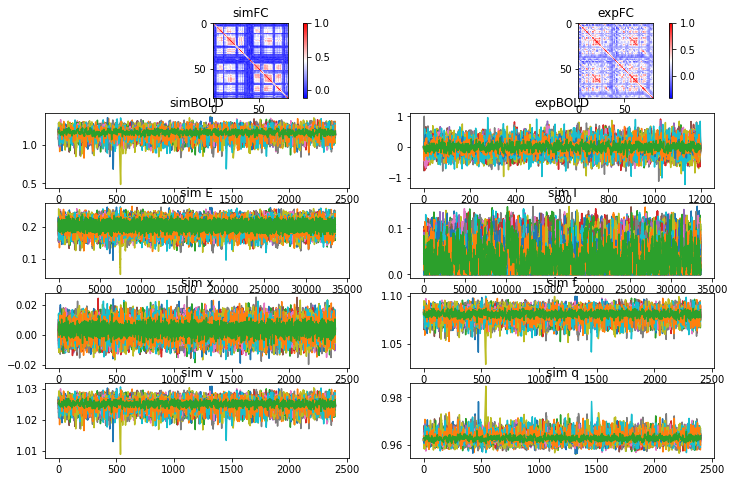

8 154532
epoch:  0 0.3462562972229344
epoch:  1 0.5008039689930571
epoch:  2 0.5863084986795982
epoch:  3 0.6373436891640082
epoch:  4 0.6066490330107283
epoch:  5 0.6069622858462428
epoch:  6 0.675807362236703
epoch:  7 0.6813675756822114
epoch:  8 0.678517181236137
epoch:  9 0.6934775097229857
epoch:  10 0.702419830542095
epoch:  11 0.6913446256052846
epoch:  12 0.6922735642627249
epoch:  13 0.6941326375640915
epoch:  14 0.6928429971529197
epoch:  15 0.7141945185303942
epoch:  16 0.7035293267153258
epoch:  17 0.7040869658607076
epoch:  18 0.698393436663741
epoch:  19 0.7071913938010602
0.6925188889087355


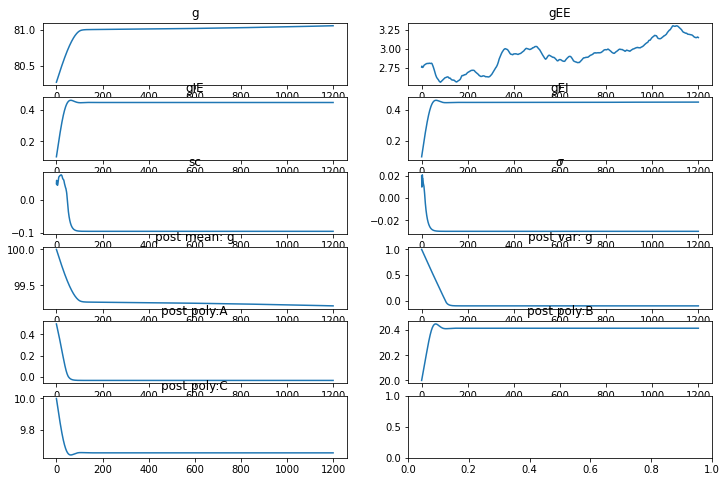

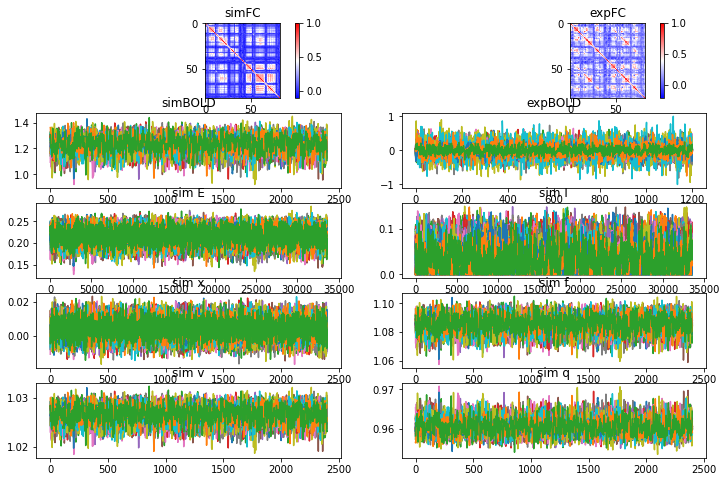

9 154936
epoch:  0 0.3339872759527456
epoch:  1 0.4513552474523068
epoch:  2 0.5035360218398869
epoch:  3 0.516212590856775
epoch:  4 0.5565934399694651
epoch:  5 0.579302808960363
epoch:  6 0.5948469455393484
epoch:  7 0.599020176909862
epoch:  8 0.5561755740260501
epoch:  9 0.5805330173639195
epoch:  10 0.6229015458770357
epoch:  11 0.6274561122540118
epoch:  12 0.6049214009434541
epoch:  13 0.62321954359048
epoch:  14 0.6098893655444253
epoch:  15 0.6187677179246205
epoch:  16 0.6179089126613406
epoch:  17 0.6263470495472642
epoch:  18 0.6264009829270111
epoch:  19 0.6123269143292965
0.6109030549202353


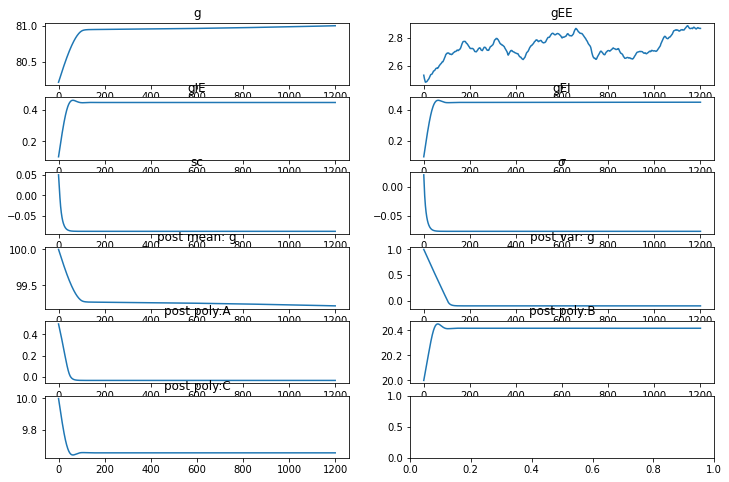

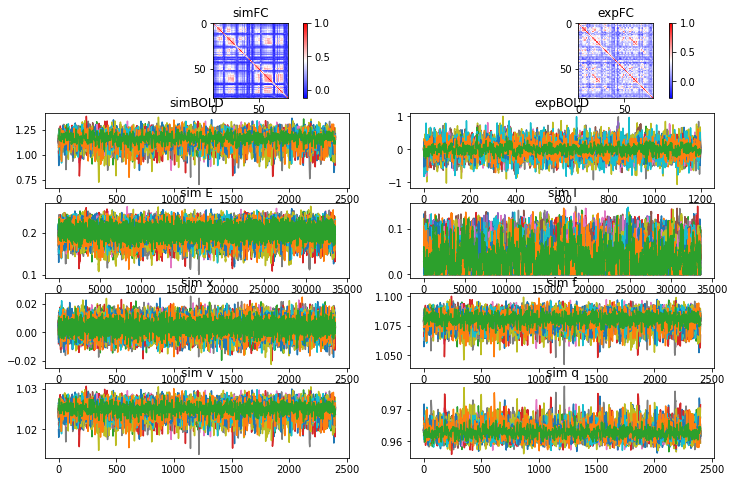

10 156435
epoch:  0 0.4568457905250189
epoch:  1 0.36639103715639326
epoch:  2 0.30535531354028317
epoch:  3 0.3357288236233258
epoch:  4 0.3575368243308755
epoch:  5 0.3233310236402246
epoch:  6 0.3819360789539199
epoch:  7 0.4563746355584303
epoch:  8 0.6182913362062149
epoch:  9 0.7063165040616877
epoch:  10 0.7368665179365914
epoch:  11 0.7160777539863155
epoch:  12 0.71858707874606
epoch:  13 0.745891321174893
epoch:  14 0.7450695808630224
epoch:  15 0.7166627433282056
epoch:  16 0.7743401002940532
epoch:  17 0.7576069756900765
epoch:  18 0.7609987819355968
epoch:  19 0.739390544862806
0.7439288973506893


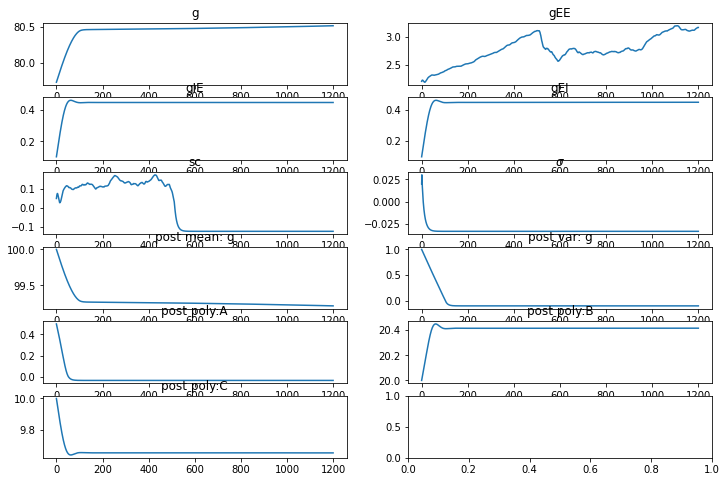

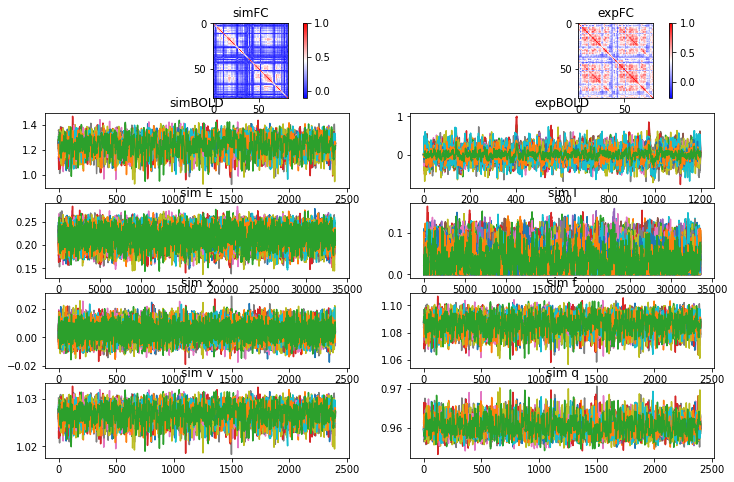

11 156637
epoch:  0 0.4153002756476262
epoch:  1 0.626660257432499
epoch:  2 0.6358119124081736
epoch:  3 0.7974096993876593
epoch:  4 0.805452532515461
epoch:  5 0.8400374943223318
epoch:  6 0.8167252611157251
epoch:  7 0.8279414591610315
epoch:  8 0.868846098972875
epoch:  9 0.851532660031802
epoch:  10 0.8308095733270635
epoch:  11 0.8402844139746269
epoch:  12 0.8260543990334649
epoch:  13 0.8392860181091872
epoch:  14 0.8309769241814504
epoch:  15 0.8521482764233369
epoch:  16 0.8571479381316821
epoch:  17 0.834807648810698
epoch:  18 0.8781279877565445
epoch:  19 0.8445718510182645
0.8390810626672569


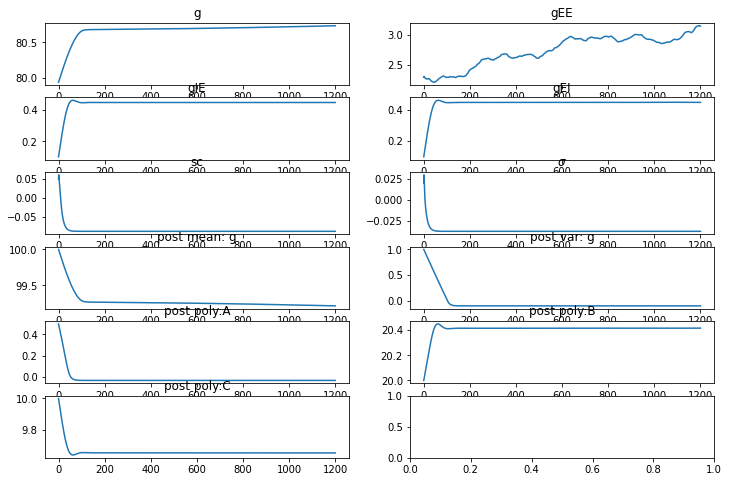

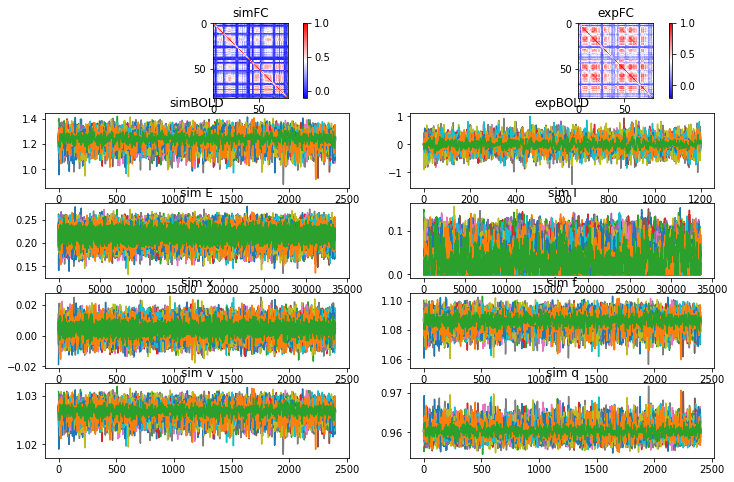

12 157336
epoch:  0 0.3617005874287485
epoch:  1 0.5346878599107026
epoch:  2 0.5536165458619082
epoch:  3 0.6152429633582285
epoch:  4 0.6406797010303077
epoch:  5 0.6403220280967977
epoch:  6 0.6600439304403054
epoch:  7 0.6742144325227529
epoch:  8 0.6753293384750648
epoch:  9 0.6585170196036334
epoch:  10 0.6829001807284767
epoch:  11 0.6825065128267866
epoch:  12 0.6834941723136982
epoch:  13 0.6884730163487629
epoch:  14 0.6988888270139731
epoch:  15 0.7013962127058531
epoch:  16 0.6874181724525149
epoch:  17 0.6918635004154372
epoch:  18 0.6910092507349171
epoch:  19 0.6923341432790849
0.6946160046233022


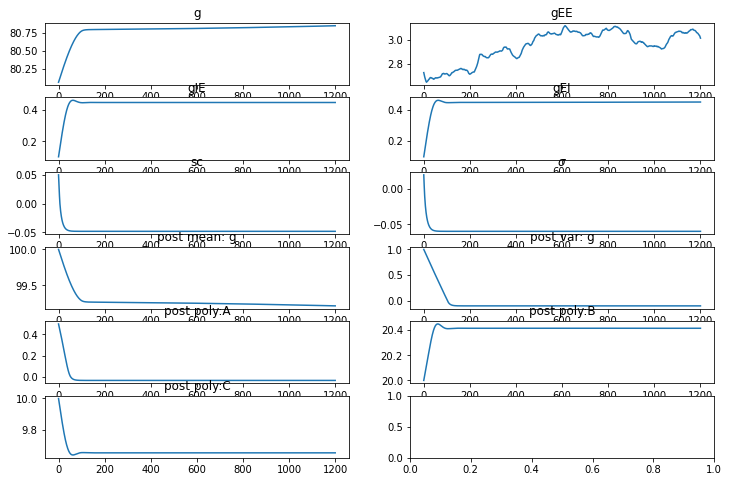

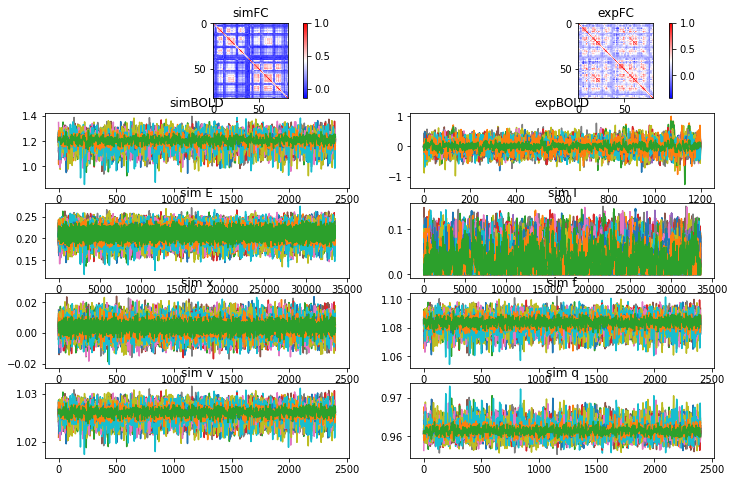

13 171532
epoch:  0 0.35302535174365157
epoch:  1 0.49649315977793185
epoch:  2 0.5811868743920772
epoch:  3 0.6012943072049608
epoch:  4 0.628482999671071
epoch:  5 0.6397323539500228
epoch:  6 0.6484696157339993
epoch:  7 0.7009055253642538
epoch:  8 0.6996741576499219
epoch:  9 0.6873180166686008
epoch:  10 0.6969260512855959
epoch:  11 0.7007308192519832
epoch:  12 0.7026576958417108
epoch:  13 0.7067889029637437
epoch:  14 0.7070518883610475
epoch:  15 0.701240168089407
epoch:  16 0.7215901669467893
epoch:  17 0.7223852708194821
epoch:  18 0.7112525349766973
epoch:  19 0.7122149514861537
0.7307292003200191


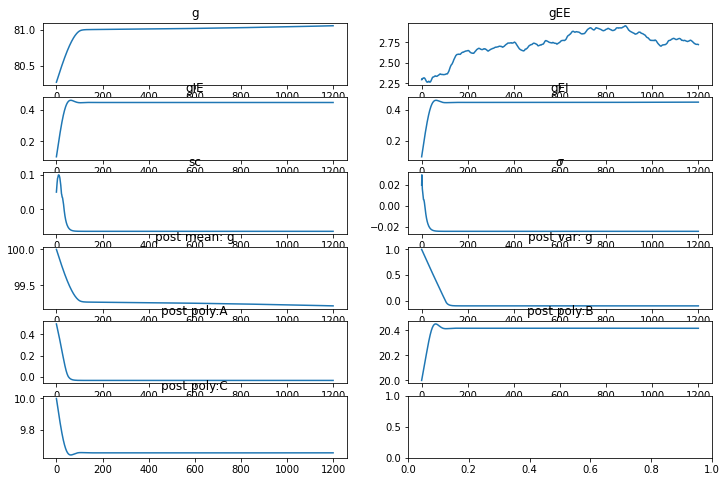

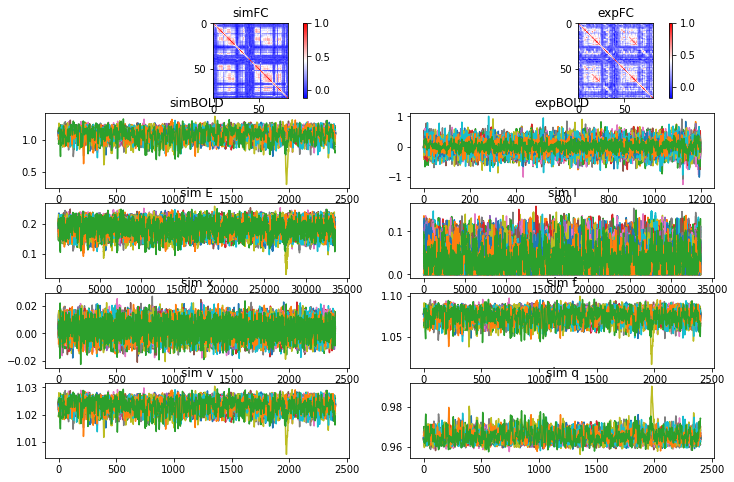

14 171633
epoch:  0 0.4945146075466752
epoch:  1 0.31619820376367475
epoch:  2 0.31579253527899537
epoch:  3 0.544331484753788
epoch:  4 0.5788039723245586
epoch:  5 0.6461343089763623
epoch:  6 0.6442302437605549
epoch:  7 0.6660703562275763
epoch:  8 0.6862540581792426
epoch:  9 0.6789986682382182
epoch:  10 0.6969950040633962
epoch:  11 0.6970958764196016
epoch:  12 0.6956902752937654
epoch:  13 0.6982142338959046
epoch:  14 0.7056751211369057
epoch:  15 0.6991058169299749
epoch:  16 0.7012883226153398
epoch:  17 0.7021369208261833
epoch:  18 0.7041955411035372
epoch:  19 0.7125996638628239
0.7094274166690678


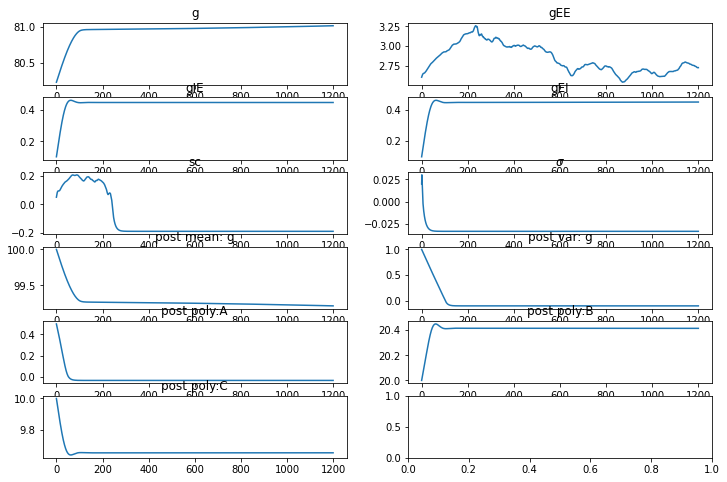

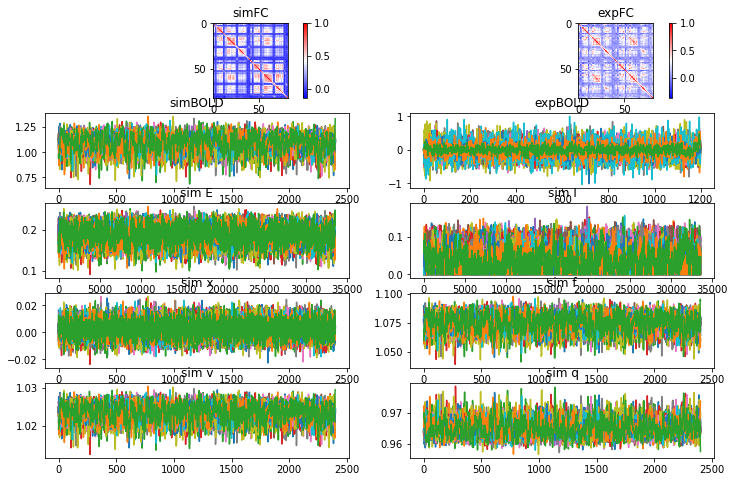

15 172332
epoch:  0 0.37952665500341776
epoch:  1 0.2882713236053809
epoch:  2 0.46436076414066524
epoch:  3 0.5811207321030345
epoch:  4 0.656707620796129
epoch:  5 0.6998261771153553
epoch:  6 0.6993929686313272
epoch:  7 0.7160599786495884
epoch:  8 0.7348510717462136
epoch:  9 0.7365739648224314
epoch:  10 0.7443960765190771
epoch:  11 0.7425563551543218
epoch:  12 0.7433095574908779
epoch:  13 0.7511072929588738
epoch:  14 0.7431733587630067
epoch:  15 0.7557054222938329
epoch:  16 0.7693260902483544
epoch:  17 0.7433221289420716
epoch:  18 0.7547967045831606
epoch:  19 0.7592580404242507
0.7566599340606645


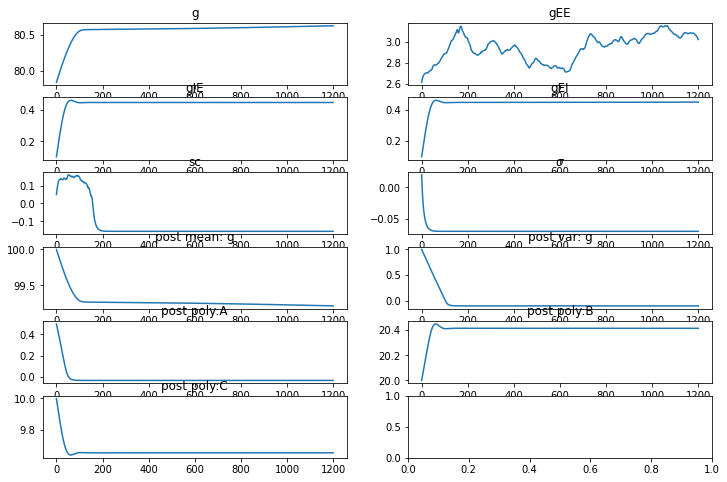

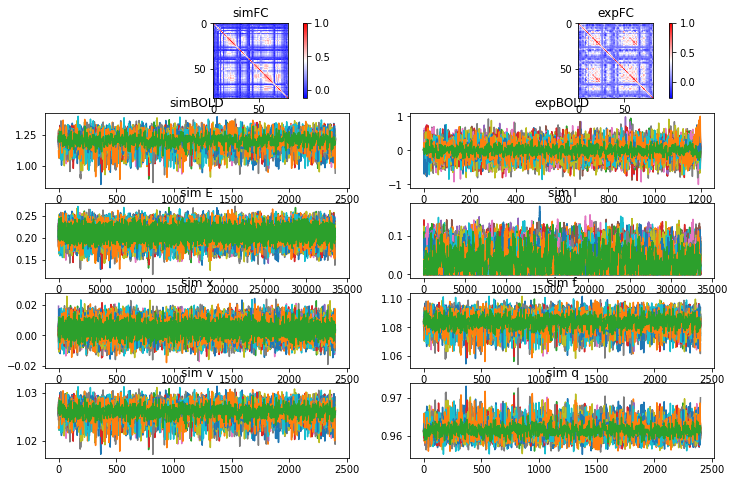

16 173536
epoch:  0 0.4003136643943333
epoch:  1 0.5205862688664094
epoch:  2 0.6268432045218453
epoch:  3 0.7165638518729961
epoch:  4 0.6663755318437722
epoch:  5 0.7277803231367723
epoch:  6 0.6891112864425438
epoch:  7 0.721025226241674
epoch:  8 0.710574433925346
epoch:  9 0.7271483449635526
epoch:  10 0.7227024845421773
epoch:  11 0.7206221428118024
epoch:  12 0.7675273991637569
epoch:  13 0.752968310597971
epoch:  14 0.7635153070693228
epoch:  15 0.7807983424933296
epoch:  16 0.7896562844337749
epoch:  17 0.7423084852954862
epoch:  18 0.7487694462110328
epoch:  19 0.7440865530245849
0.7779757444078244


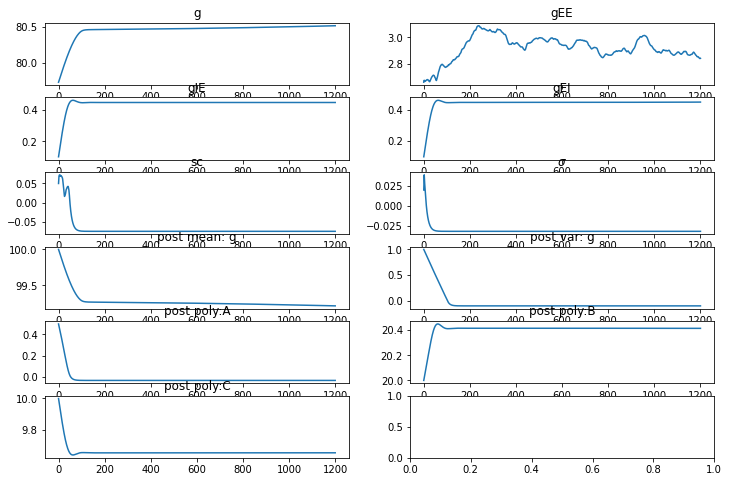

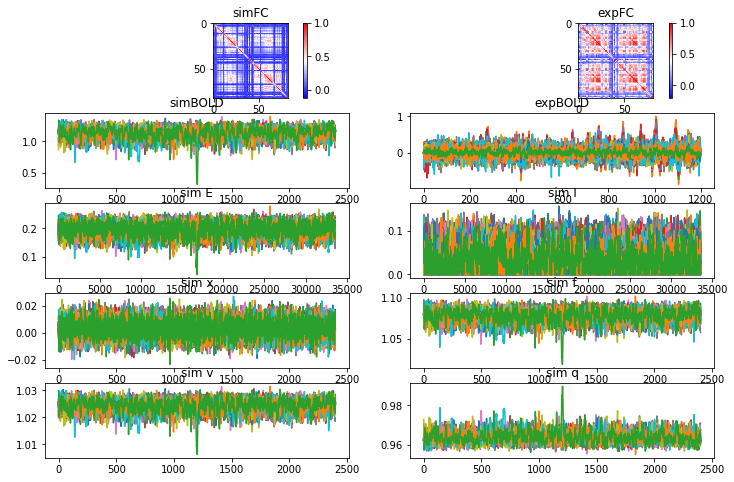

17 173637
epoch:  0 0.5384194732729705
epoch:  1 0.445393225652083
epoch:  2 0.6043975671704933
epoch:  3 0.7038315187421204
epoch:  4 0.7127494015093977
epoch:  5 0.7980537722844259
epoch:  6 0.7855806507742433
epoch:  7 0.8181268999727446
epoch:  8 0.8239664814671815
epoch:  9 0.825570864805197


In [ ]:
start_time = time.time()



#subs_s = ['562446', '257542', '154936' ] 

for i in range(40):
    
    
    
    node_size = 83
    mask = np.tril_indices(node_size, -1)
    num_epoches = 20
    batch_size = 20
    step_size = 0.05
    input_size = 2
    tr = 0.75
    sub=subs[i]
    print(i, sub)
    sc_file = base_dir +'weights_'+sub+'.txt'
    ts_file = base_dir +sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'#out_dir+'sub_'+sub+'simBOLD_idt.txt'#
   
    if os.path.isfile(sc_file) and os.path.isfile(ts_file):
        sc = np.loadtxt(sc_file)
        SC =(sc+sc.T)*0.5
       
        sc = np.log1p(SC)/np.linalg.norm(np.log1p(SC))

        

        
        
        ts_pd = pd.read_pickle(ts_file)
        ts = ts_pd.values
        #ts = np.loadtxt(ts_file)
        ts =ts/np.max(ts)
        fc_emp = np.corrcoef(ts.T)
        # Get the WWD model module for forward in a batch. 
        

        model = RNNWWD(input_size, node_size, batch_size, step_size, tr, sc, True, g_mean_ini=80, g_std_ini = .1, gEE_mean_ini=2.5, gEE_std_ini = .1)


        
        # call model fit method
        F = Model_fitting(model, ts, num_epoches)

        # fit data(train)

        output_train = F.train()

        
        output_test = F.test(120)
        plot_fit_parameters(output_train)
        plot_sim_states_outputs(ts, output_test)

        sc_mod = np.zeros_like(sc)
        sc_mod[mask] = output_train['gains'][-100:].mean(0)
        sc_mod = sc_mod+sc_mod.T
        w = (1 + np.tanh(sc_mod))*sc
        w_n = 0.5*(w + w.T)/np.linalg.norm(0.5*(w + w.T))
        np.savetxt(out_dir + 'bold_test_'+ sub +'.txt', output_test['simBOLD'])
        np.savetxt(out_dir + 'bold_train_'+ sub +'.txt', output_train['simBOLD'])
        np.savetxt(out_dir + 'sc_mod_'+ sub +'.txt', sc_mod)
        #np.savetxt(out_dir + 'sc_'+ sub +'.txt', sc)
        g=  output_train['g'][-100:].mean()
        gEE = output_train['gEE'][-100:].mean()
        gEI = output_train['gEI'][-100:].mean()
        gIE = output_train['gIE'][-100:].mean()


        np.savetxt(out_dir + 'parameters_'+ sub +'.txt', np.array([g,gEE, gIE, gEI]).T)
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

In [14]:
start_time = time.time()


for i in range(0, 40):
    sub=subs[i]
    print(i, sub)
    

    node_size = 83
    num_epoches = 20
    batch_size =20
    step_size = 0.05
    input_size = 2
    tr = 0.75
    sc_file = base_dir +'weights_'+sub+'.txt'
    ts_file = out_dir + 'bold_test_'+ sub +'.txt'
   
    if os.path.isfile(sc_file) and os.path.isfile(ts_file):
        
        sc = np.loadtxt(sc_file)
        SC =(sc+sc.T)*0.5
       
        sc = np.log1p(SC)/np.linalg.norm(np.log1p(SC))

        

        sc_mod = np.zeros_like(sc)
        
        
        ts = np.loadtxt(ts_file)
        ts = (ts/np.max(ts))[:,:1200]
        fc_emp = np.corrcoef(ts[:,:1200])
        print(fc_emp.shape)
        # Get the WWD model module for forward in a batch. 
        

        model = RNNWWD(input_size, node_size, batch_size, step_size, tr, sc, True,  g_mean_ini=100, g_std_ini = .1, gEE_mean_ini=2.5, gEE_std_ini = .1)


        
        # call model fit method
        F = Model_fitting(model, ts.T, num_epoches)

        # fit data(train)

        output_train = F.train()

        
        output_test = F.test(120)
        plot_fit_parameters(output_train)
        plot_sim_states_outputs(ts.T, output_test)
        sc_mod[mask] = output_train['gains'][-100:].mean(0)
        sc_mod = sc_mod+sc_mod.T
        w = (1 + np.tanh(sc_mod))*sc
        w_n = 0.5*(w + w.T)/np.linalg.norm(0.5*(w + w.T))
        np.savetxt(out_dir + 'bold_test_idt_'+ sub +'.txt', output_test['simBOLD'])
        np.savetxt(out_dir + 'bold_train_idt_'+ sub +'.txt', output_train['simBOLD'])
        np.savetxt(out_dir + 'sc_mod_idt_'+ sub +'.txt', sc_mod)
        #np.savetxt(out_dir + 'sc_'+ sub +'.txt', sc)
        g=  output_train['g'][-100:].mean()
        gEE = output_train['gEE'][-100:].mean()
        gEI = output_train['gEI'][-100:].mean()
        gIE = output_train['gIE'][-100:].mean()


        np.savetxt(out_dir + 'parameters_idt_'+ sub +'.txt', np.array([g,gEE, gIE, gEI]).T)
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
np.loadtxt(ts_file).shape

(83, 2400)

In [ ]:
output_test['simBOLD'].shape

(83, 2400)

In [ ]:
"""HCP_ts_sim ={}
HCP_ts_test ={}
HCP_paras = {}
HCP_ts = {}
HCP_sc = {}
HCP_sc_mod = {}
for i in range(40):
    sub = subs[i]
    
    """ts_file = base_dir +sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'#out_dir+'sub_'+sub+'simBOLD_idt.txt'#
   
    ts_pd = pd.read_pickle(ts_file)
    ts = ts_pd.values
    HCP_ts[sub] = ts"""
    HCP_ts_test[sub] = np.loadtxt(out_dir + 'bold_test_'+ sub +'.txt')
    HCP_ts_sim[sub] = np.loadtxt(out_dir + 'bold_train_'+ sub +'.txt')
    
    HCP_sc_mod[sub] = np.loadtxt(out_dir + 'sc_mod_'+ sub +'.txt')
    
    HCP_paras[sub] = np.loadtxt(out_dir + 'parameters_'+ sub +'.txt')
    
np.save(out_dir +'HCP_ts_sim.npy', HCP_ts_sim)
np.save(out_dir + 'HCP_ts_test.npy', HCP_ts_test)
#np.save(out_dir + 'HCP_ts.npy', HCP_ts)
np.save(out_dir + 'HCP_sc_mod.npy', HCP_sc_mod)
np.save(out_dir + 'HCP_fitparas.npy', HCP_paras)"""

In [15]:
HCP_ts_sim ={}
HCP_ts_test ={}
HCP_paras = {}

HCP_sc_mod = {}
for i in range(40):
    sub = subs[i]
    

    HCP_ts_test[sub] = np.loadtxt(out_dir + 'bold_test_idt_'+ sub +'.txt')
    HCP_ts_sim[sub] = np.loadtxt(out_dir + 'bold_train_idt_'+ sub +'.txt')
    
    HCP_sc_mod[sub] = np.loadtxt(out_dir + 'sc_mod_idt_'+ sub +'.txt')
    
    HCP_paras[sub] = np.loadtxt(out_dir + 'parameters_idt_'+ sub +'.txt')
    
for i in range(3):
    sub = subs_s[i]
    

    HCP_ts_test[sub] = np.loadtxt(out_dir + 'bold_test_idt_'+ sub +'.txt')
    HCP_ts_sim[sub] = np.loadtxt(out_dir + 'bold_train_idt_'+ sub +'.txt')
    
    HCP_sc_mod[sub] = np.loadtxt(out_dir + 'sc_mod_idt_'+ sub +'.txt')
    
    HCP_paras[sub] = np.loadtxt(out_dir + 'parameters_idt_'+ sub +'.txt')
np.save(out_dir +'HCP_ts_sim_idt.npy', HCP_ts_sim)
np.save(out_dir + 'HCP_ts_test_idt.npy', HCP_ts_test)
np.save(out_dir + 'HCP_sc_mod_idt.npy', HCP_sc_mod)


np.save(out_dir + 'HCP_fitparas_idt.npy', HCP_paras)